# Correlation and Autocorrelation in Time Series - Lab

## Introduction

In this lab, you'll practice your knowledge of correlation, autocorrelation, and partial autocorrelation by working on three different datasets. 

## Objectives

In this lab you will: 

- Plot and discuss the autocorrelation function (ACF) for a time series 
- Plot and discuss the partial autocorrelation function (PACF) for a time series 

## The Exchange Rate Data

We'll be looking at the exchange rates dataset again. 

- First, run the following cell to import all the libraries and the functions required for this lab 
- Then import the data in `'exch_rates.csv'` 
- Change the data type of the `'Frequency'` column 
- Set the `'Frequency'` column as the index of the DataFrame 

In [2]:
# Import all packages and functions
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib.pylab import rcParams

In [7]:
# Import data
xr = pd.read_csv('exch_rates.csv')

# Change the data type of the 'Frequency' column 
xr["Frequency"] = pd.to_datetime(xr["Frequency"])

# Set the 'Frequency' column as the index
xr.set_index("Frequency", inplace = True)
xr.head()

,Euro,Australian Dollar,Danish Krone
Frequency,,,
2000-01-01,NaN,NaN,NaN
2000-01-02,NaN,NaN,NaN
2000-01-03,0.991080,1.520912,7.374034
2000-01-04,0.970403,1.521300,7.222610
2000-01-05,0.964506,1.521316,7.180170


Plot all three exchange rates in one graph: 

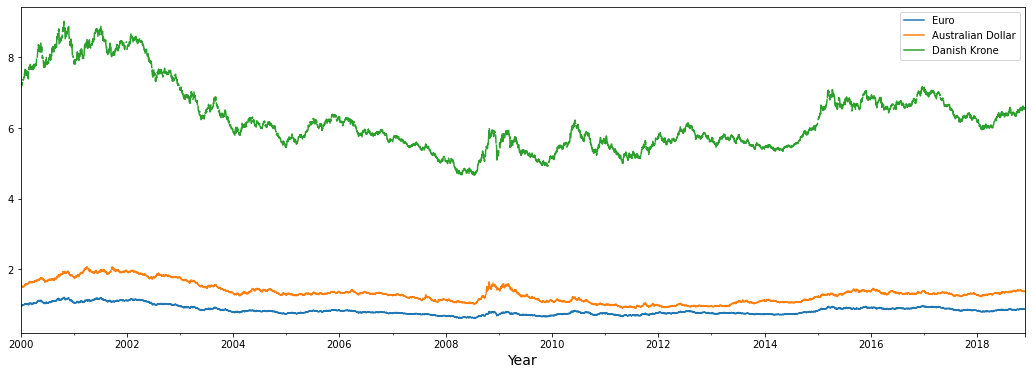

In [14]:
# Plot here

xr.plot(figsize = (18, 6));
plt.xlabel("Year", fontsize=14);

You can see that the EUR/USD and AUD/USD exchange rates are somewhere between 0.5 and 2, whereas the Danish Krone is somewhere between 4.5 and 9. Now let's look at the correlations between these time series. 

In [15]:
# Correlation
xr.corr()

,Euro,Australian Dollar,Danish Krone
Euro,1.000000,0.883181,0.999952
Australian Dollar,0.883181,1.000000,0.882513
Danish Krone,0.999952,0.882513,1.000000


### What is your conclusion here? You might want to use outside resources to understand what's going on.

In [19]:
### G

# The exchange rates for Euro and the Australian dollar are highly correlated, 
# but there are differences. The Euro and the Danish Krone, however, is perfectly correlated. 
# If you do further research you'll notice that the Danish Krone is pegged to the Euro, 
# which means that they are basically designed to perfectly correlate together! 
# The fact that the value is just very, very close to 1 is due to rounding errors. 
# Usually when the correlation is so close to 1 (or -1), it's too good to be true. 
# So make sure you always dig deeper to correctly understand and interpret these numbers.  

Next, look at the plots of the differenced (1-lag) series. Use subplots to plot them rather than creating just one plot. 

In [20]:
# 1-lag differenced series 
xr_diff = xr.diff(periods = 1)

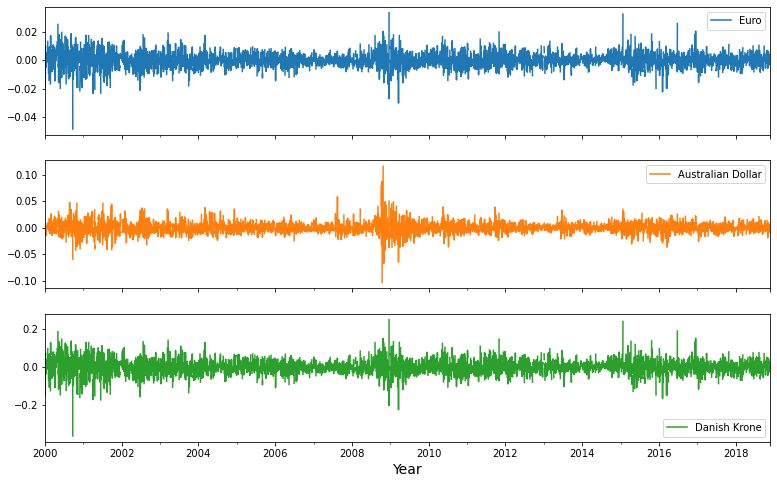

In [24]:
# Plot
xr_diff.plot(figsize = (13, 8), subplots = True, legend=True);
plt.xlabel("Year", fontsize=14);

Calculate the correlation of this differenced time series. 

In [25]:
# Correlation 
xr_diff.corr()

,Euro,Australian Dollar,Danish Krone
Euro,1.000000,0.545369,0.999667
Australian Dollar,0.545369,1.000000,0.545133
Danish Krone,0.999667,0.545133,1.000000


### Explain what's going on

In [26]:
## G

# Differencing the series here led to a decrease 
# in correlation between the EUR/USD and AUD/USD series. 
# If you think a little further, this makes sense: in the previous lesson, 
# the high correlation was a result of seasonality. 
# Differencing led to an increase in correlation between series, 
# here the series are moving in (more or less) the same direction 
# on a day-to-day basis and seasonality is not present, hence this result.



Next, let's look at the "lag-1 autocorrelation" for the EUR/USD exchange rate. 

- Create a "lag-1 autocorrelation" series 
- Combine both the original and the shifted ("lag-1 autocorrelation") series into a DataFrame 
- Plot these time series, and look at the correlation coefficient 

In [27]:
# Isolate the EUR/USD exchange rate
eur = xr[['Euro']]

# "Shift" the time series by one period
eur_shift_1 = eur.shift(periods = 1)

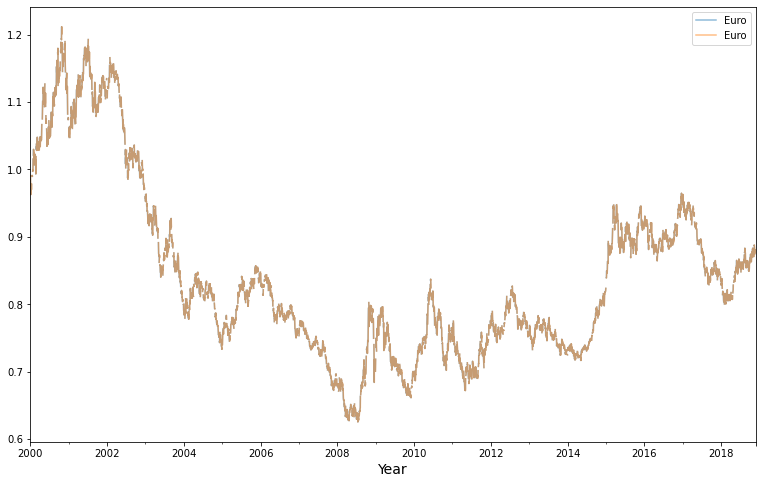

In [33]:
# Combine the original and shifted time series
lag_1 = pd.concat([eur, eur_shift_1], axis = 1)

# Plot 
lag_1.plot(figsize = (13, 8), subplots = False, legend=True, alpha = 0.5);
plt.xlabel("Year", fontsize=14);

In [34]:
# Correlation
lag_1.corr()

,Euro,Euro
Euro,1.000000,0.999146
Euro,0.999146,1.000000


Repeat this for a "lag-50 autocorrelation". 

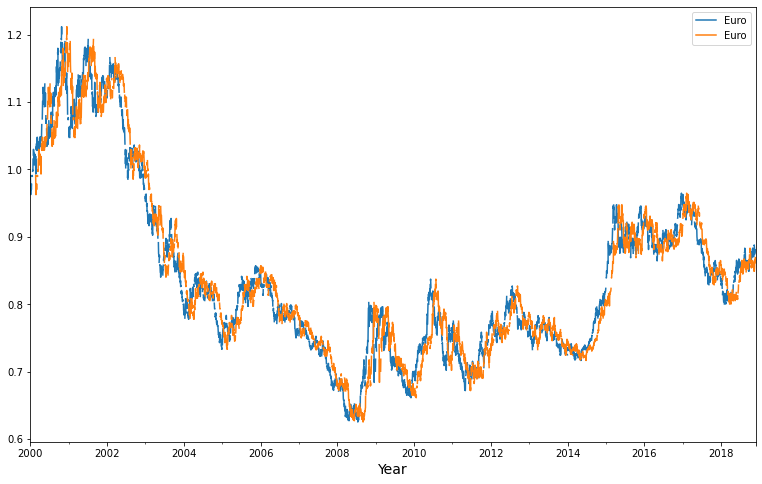

In [37]:
# "Shift" the time series by 50 periods
eur_shift_50 = eur.shift(periods = 50)

# Combine the original and shifted time series
lag_50 = pd.concat([eur, eur_shift_50], axis = 1)

# Plot
lag_50.plot(figsize = (13, 8), subplots = False, legend=True, alpha = 1);
plt.xlabel("Year", fontsize=14);

In [38]:
# Correlation
lag_50.corr()

,Euro,Euro
Euro,1.000000,0.968321
Euro,0.968321,1.000000


### What's your conclusion here?

In [39]:
### G

# Autocorrelation is very high in these time series, even up to a lag as big as 50! 
# This is no big surprise though: remember that these are random walk series, 
# which are highly recursive, as each value depends heavily on the previous one!



Knowing this, let's plot the ACF now.

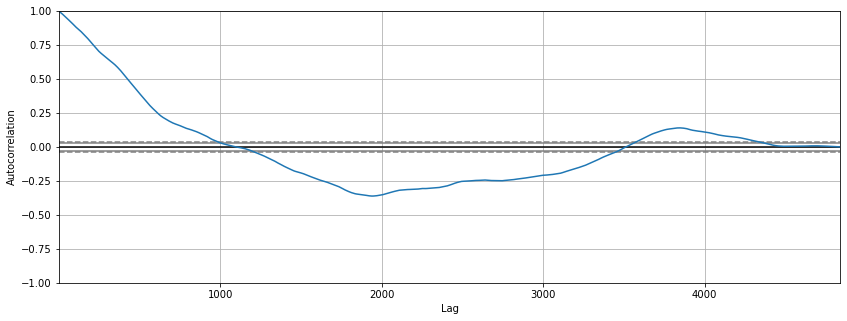

In [62]:
# Plot ACF
# rcParams['figure.figsize'] = 14, 5
fig, ax = plt.subplots(figsize = (14, 5))
pd.plotting.autocorrelation_plot(eur.dropna());


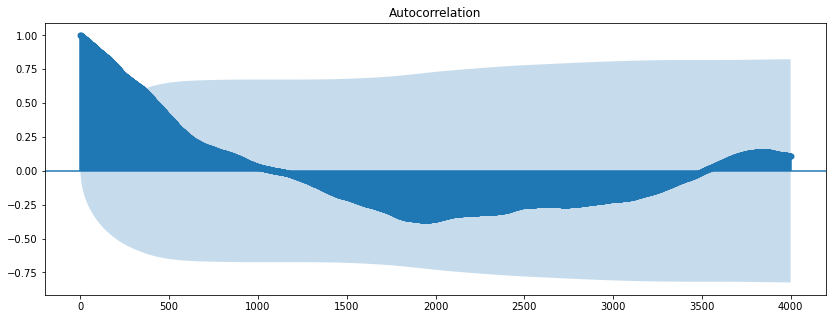

In [68]:
# rcParams['figure.figsize'] = 14, 5
fig, ax = plt.subplots(figsize = (14, 5))
plot_acf(eur.dropna(), lags = 4000, ax = ax);

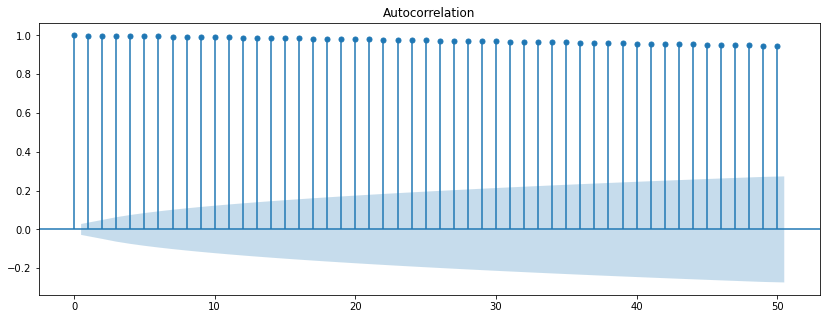

In [69]:
# rcParams['figure.figsize'] = 14, 5
fig, ax = plt.subplots(figsize = (14, 5))
plot_acf(eur.dropna(), lags = 50, ax = ax);

The series is heavily autocorrelated at first, and then there is a decay. This is a typical result for a series that is a random walk, generally you'll see heavy autocorrelations first, slowly tailing off until there is no autocorrelation anymore.

Next, let's look at the partial autocorrelation function plot.

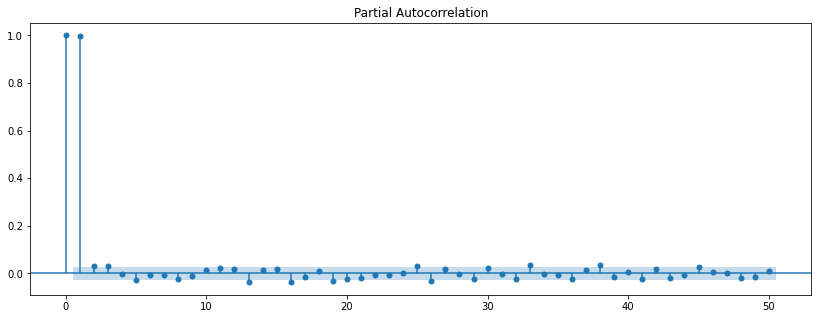

In [70]:
# Plot PACF
fig, ax = plt.subplots(figsize = (14, 5))
plot_pacf(eur.dropna(), lags = 50, ax = ax);

This is interesting! Remember that *Partial Autocorrelation Function* gives the partial correlation of a time series with its own lagged values, controlling for the values of the time series at all shorter lags. When controlling for 1 period, the PACF is only very high for one-period lags, and basically 0 for shorter lags. This is again a typical result for random walk series!

## The Airpassenger Data

Let's work with the air passenger dataset you have seen before. Plot the ACF and PACF for both the differenced and regular series. 

> Note: When plotting the PACF, make sure you specify `method='ywm'` in order to avoid any warnings. 

In [71]:
# Import and process the air passenger data
air = pd.read_csv('passengers.csv')
air['Month'] = pd.to_datetime(air['Month'])
air.set_index('Month', inplace=True)
air.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


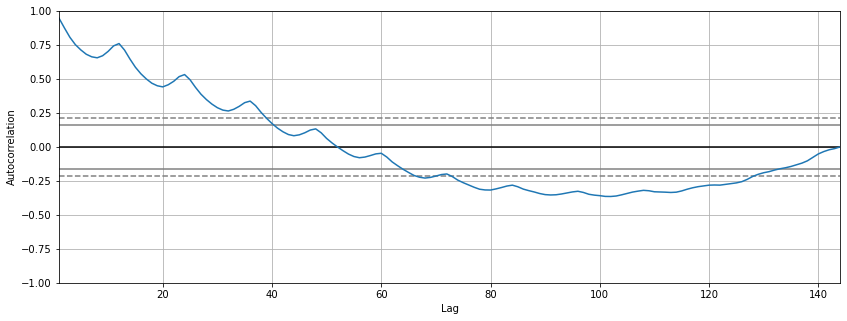

In [82]:
#  Plot ACF
# rcParams['figure.figsize'] = 14, 5
fig, ax = plt.subplots(figsize = (14, 5))
pd.plotting.autocorrelation_plot(air);


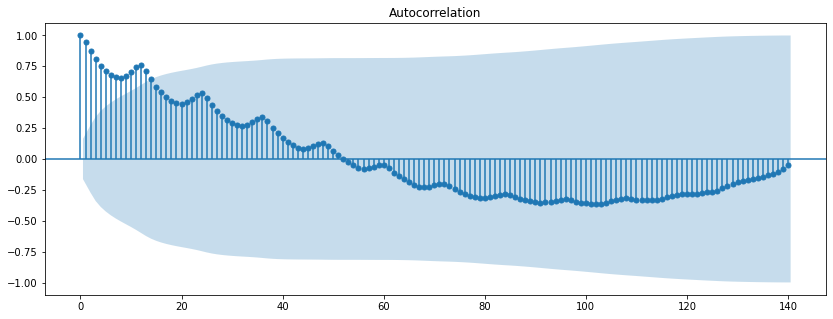

In [74]:
# Plot ACF (regular)
fig, ax = plt.subplots(figsize = (14, 5))
plot_acf(air, lags = 140, ax = ax);

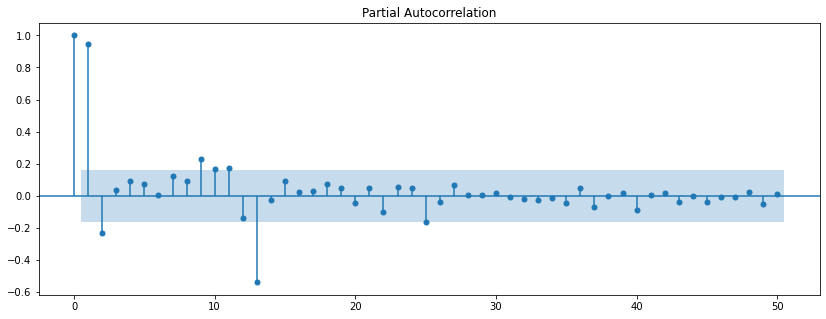

In [78]:
# Plot PACF (regular)
fig, ax = plt.subplots(figsize = (14, 5))
plot_pacf(air, lags = 50, ax = ax, method='ywm');

In [85]:
# Generate a differenced series
air_diff = air.diff(periods = 1)

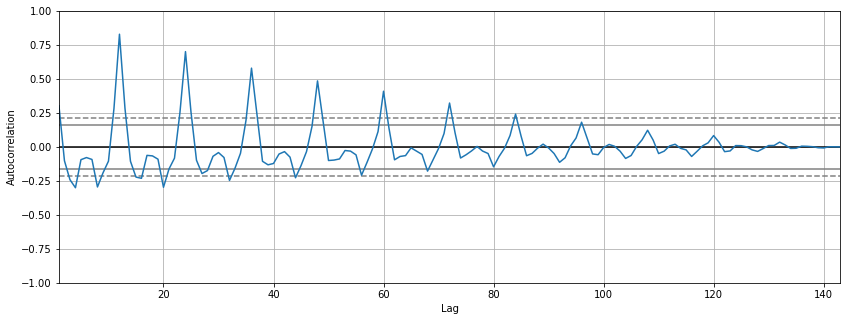

In [88]:
#  Plot ACF
# rcParams['figure.figsize'] = 14, 5
fig, ax = plt.subplots(figsize = (14, 5))
pd.plotting.autocorrelation_plot(air_diff.dropna());


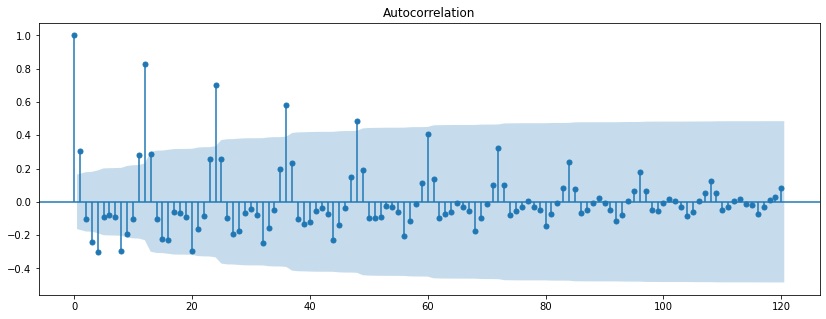

In [93]:
# Plot ACF (differenced)
fig, ax = plt.subplots(figsize = (14, 5))
plot_acf(air_diff.dropna(), lags = 120, ax = ax);


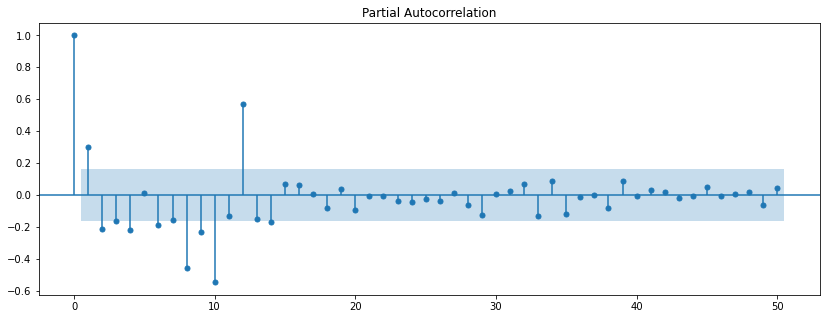

In [89]:
# Plot PACF (differenced)
# Plot PACF (regular)
fig, ax = plt.subplots(figsize = (14, 5))
plot_pacf(air_diff.dropna(), lags = 50, ax = ax, method='ywm');

### Your conclusion here

In [ ]:
### G

# The result reminds us a lot of the google trends data. 
# The seasonality is much more clear in the differenced time series. 
# The PACF has just one very strong correlation, right at 12 months.



## The NYSE data

Are you getting the hang of interpreting ACF and PACF plots? For one final time, plot the ACF and PACF for both the NYSE time series. 

> Note: When plotting the PACF, make sure you specify `method='ywm'` in order to avoid any warnings. 

In [97]:
# Import and process the NYSE data
nyse = pd.read_csv('NYSE_monthly.csv') 
nyse['Month'] = pd.to_datetime(nyse['Month'])
nyse.set_index('Month', inplace=True)
nyse.head()

,monthly_return
Month,
1961-01-01,0.082
1961-02-01,0.059
1961-03-01,0.050
1961-04-01,0.008
1961-05-01,0.042


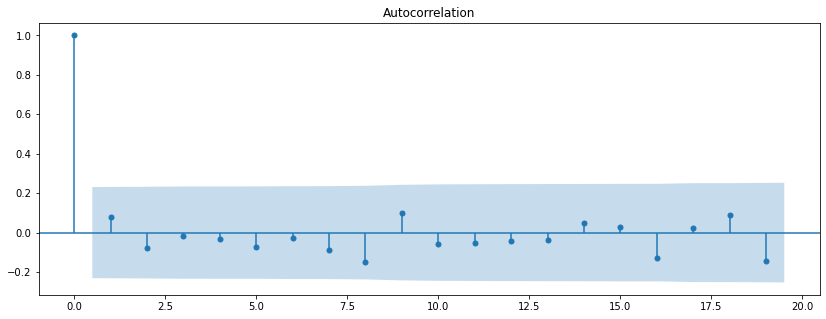

In [98]:
# Plot ACF
# Plot ACF (differenced)
fig, ax = plt.subplots(figsize = (14, 5))
plot_acf(nyse, ax = ax);

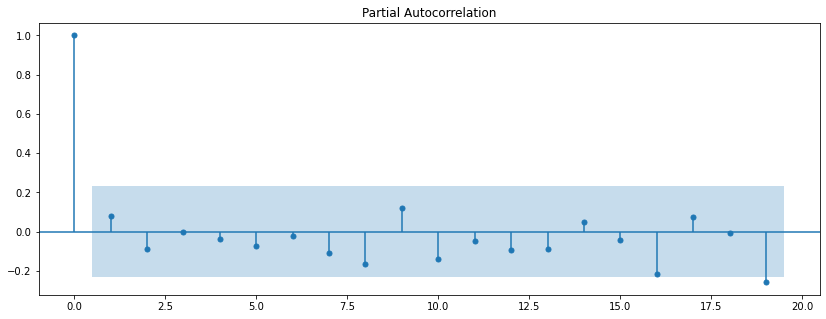

In [99]:
# Plot PACF
# Plot ACF (differenced)
fig, ax = plt.subplots(figsize = (14, 5))
plot_pacf(nyse, ax = ax);

## Your conclusion here

In [100]:
### G

# Autocorrelations and partial autocorrelations are virtually 0 for any lag. 
# This is no surprise! The NYSE series was a white noise series, meaning there
# is no trend or no seasonality! This is, again, a typical result for these kind of series.



## Summary

Great, you've now been introduced to ACF and PACF. Let's move into more serious modeling with autoregressive and moving average models!